In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load & Init data

In [46]:
df = pd.read_csv('data.csv')
km = df['km']
price = df['price']

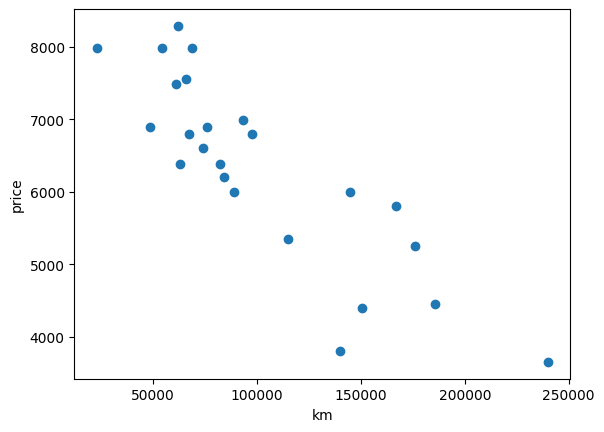

In [48]:
plt.scatter(km, price)
plt.xlabel('km')
plt.ylabel('price')
plt.show()

In [49]:
X = np.array(km)
Y = np.array(price)

m = len(X)

if m <= 1:
    raise Error('Impossible to work with one or zero exemple')

## Scaling : Standardization

Text(0, 0.5, 'price')

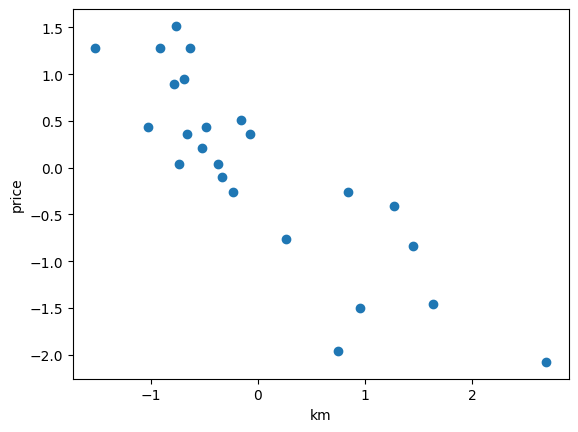

In [50]:
X_std = np.std(X)
Y_std = np.std(Y)

mean_X = np.mean(X)
mean_Y = np.mean(Y)

if X_std != 0:
    scaled_X = (X - mean_X) / X_std
    scaled_Y = (Y - mean_Y) / Y_std 
else:
    raise ZeroDivisionError('Division by 0')
    
plt.scatter(scaled_X, scaled_Y)
plt.xlabel('km')
plt.ylabel('price')

## Coeficient de corrélation linéaire

In [51]:
diff_X = X - mean_X
diff_Y = Y - mean_Y

#### Ecart-type

In [52]:
variance_X = np.var(X) 
# equivalent de np.sum((X - mean_X)**2) / (m-1)
# La variance est une mesure statistique qui indique à quel point les valeurs d'un ensemble de données sont dispersées autour de leur moyenne.
sigma_X = np.sqrt(variance_X)
# écart-type : L'écart type est souvent préféré à la variance car il est exprimé dans les mêmes unités que les données originales.
variance_Y = np.var(Y)
sigma_Y = np.sqrt(variance_Y)

#### Covariance de X et Y

In [53]:
Cov_XY = np.cov(X, Y)

print(Cov_XY[0,1])

-59511782.826086946


<font color='blue'>La Covariance est négative</font>, cela signifie que les variables ont tendance à évoluer dans des directions opposées. Ici, plus le kilometrage augmente plus le prix diminue.

#### Coefficient de corrélation

In [54]:
coef_corr = Cov_XY[0,1] / (sigma_X * sigma_Y)

# equivalent de : Cov_XY[0,1] / (np.std(X_std, ddof=1) * np.std(Y_std, ddof=1))
# equivalent de : np.corrcoef(X_std, Y_std) => coef matricielle

print(coef_corr)

-0.8933628738683501


<font color='blue'> Le coefficient de corrélation est assez proche de -1 </font> pour nous faire comprendre qu'il y a une corrélation négative (donc existante) entre le kilométrage et le prix. <font color='blue'>Une régression linéaire est donc envisageable. </font> 

## Regression linéaire

<b>Dataset</b> : (x,y) avec m exemples, n variables

<b>Model</b> : $ f(x) = ax + b $

=>   $F = Xθ$

<font color='grey'>F étant un vecteur contenant nos prédictions, et est le produit matricielle entre la matrice X et le vecteur θ. (X étant une matrice mx2 contenant tous les élément de la dataset -ici km- et θ étant notre vecteur 2x1 contenant nos paramètres a et b).<font>

<font color='red'> On aura donc bien $f(x_1) = x_1 . a + b$ </font>  <font color='grey'>pour chaque éléments ce qui nous donnera un vecteur mx1.<font>

<b>Cost function </b>: (Mean Squared Error)

$ J(θ) = \frac{1}{2m} \sum(Xθ - Y)^2 $

<font color='grey'>Y étant un vecteur mx1 de variables à trouvées, ici le prix.

<font color='grey'>J étant un scalaire égale à la moyenne de nos coûts.

<b>Gradients</b> :

$\frac {∂J(θ)}{∂θ}$ est un vecteur 2x1 contenant :

Le gradient pour a = $ \frac {∂J(θ)}{∂a} = \frac{1}{m}\sum x(ax + b - y)$

Le gradient pour b = $ \frac {∂J(θ)}{∂b} = \frac{1}{m}\sum 1(ax + b - y)$

Afin de rassembler ces deux gradients dans un vecteur il faut faire le calcul suivant :

$ \frac {∂J(θ)}{∂θ} = \frac{1}{m} X^T.(Xθ - Y)$

<b>Descente de gradient</b> :

$ θ = θ - α \frac {∂J(θ)}{∂θ} $

où $α$ est le learning_rate

In [55]:
m = len(X)
n = 1

X = np.column_stack((scaled_X, np.ones(X.shape)))

theta = np.array([2,4])

def model(X, theta):
    return X.dot(theta)

def cost(X, theta, Y):
    return (1/(2*m)) * np.sum((model(X, theta) - Y)**2)

def gradient(X, Y, theta):
    return 1/m * X.T.dot(model(X, theta) - Y)

def descent_gradient(X, Y, learning_rate, theta, n_iter):
    cost_history = np.empty(n_iter)
    for i in range(n_iter):
        theta = theta - learning_rate * gradient(X, Y, theta)
        cost_history[i] = cost(X, theta, Y)
        if cost_history[i] < 0.001:
            break
    return theta, cost_history

In [56]:
theta_final, cost_history = descent_gradient(X, Y, 0.001, theta, 5000)

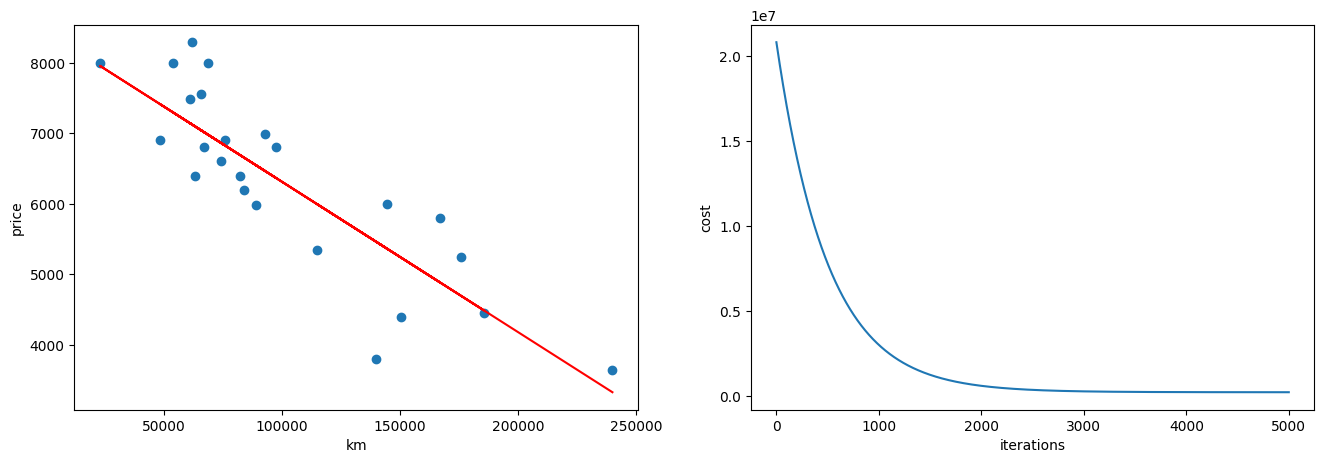

In [57]:
fig, axis = plt.subplots(1, 2, figsize=(16, 5))

axis[0].scatter(km, price)
axis[0].plot(km, model(X, theta_final), color="red")
axis[0].set_xlabel('km')
axis[0].set_ylabel('price')

axis[1].plot(cost_history)
axis[1].set_xlabel('iterations')
axis[1].set_ylabel('cost')
plt.show()

In [60]:
scaled_theta = np.zeros_like(theta_final)

# theta_final[0] est le coefficient correspondant X (km) scalé.
# std_X est l'écart-type de X non scalé.
# En divisant theta_final[0] par std_X, on revient à l'échelle d'origine.
# theta_final[1] est le coefficient correspondant à l'origine des ordonées des X scalé
scaled_theta[0] = theta_final[0] / X_std
scaled_theta[1] = theta_final[1] - (mean_X / X_std) * theta_final[0]

# plus j'ai de chiffre après la virgule et moins la prédiction est précise.
a = round(scaled_theta[0], 2)
b = round(scaled_theta[1], 2)

try:
    my_km = float(input('Enter the mileage of your car: '))
    if my_km < 0:
        print('You have to indicate a positive number.')
    else:
        predict_price = my_km * a  + b
        if predict_price <= 0:
            print('Your car is unsaleable...')
        else:
            print('Here we are : you can sale your car around', round(predict_price), '$')
except ValueError:
    print('Please, enter a real number.')


Enter the mileage of your car:  240000


Here we are : you can sale your car around 3642 $


## Calcul de la précision

<b>MSE</b> : La somme des carrés de la différence entre le point réel et celui prédit par le modèle, divisé par le nombre d'exemple. (Outliers sensitive)

$MSE =  \frac{\sum (\hat{Y} - Y)^2}{m}$

<b>RMSE</b> : Prend la racine carrée du MSE pour obtenir une mesure qui est dans la même unité que la variable cible, ce qui la rend plus interprétable.

In [61]:
Y_predicted = model(X, theta_final)

MSE = np.mean((Y_predicted - Y)**2)
RMSE = np.sqrt(MSE)

print('The margin of error of the prediction model (using RMSE) is : ', format(RMSE, '.3f'), '$')

The margin of error of the prediction model (using RMSE) is :  668.962 $
